## 

# <center>Steam games<center>

Перед Вами представлен датасет с данными по играм на площадке `Steam`. Ниже присутствует описание данных. Вашей задачей будет провести исследовательский анализ данных и выполнить определенные задачи:
* Провести предобработку данных (пропуски, дубликаты и т.д.) 
* Рассчитайте среднюю стоимость игр в `Steam`
* Постройте диаграмму, которая иллюстрирует какое количество игр поддерживает английский язык, а какое — нет
* Постройте диаграмму, которая иллюстрирует какое количество игр является бесплатными, а какое требуется покупать
* Постройте сводную таблицу с количеством выпущенных игр за каждый год (постройте для неё гистограмму)
* Найдите и постройте диаграмму для топ 10 разработчиков видеоигр и отдельно для топ 10 издателей видеоигр, начиная с 2017 года (включительно)
* Необходимо вывести топ 6 игр по количеству пользователей (`owners`)


**После выполнения каждого условия необходимо писать выводы. Также необходим общий вывод в конце о всей проделанной работе с краткими выводами из данных пунктов.**

---
**ЗАДАНИЯ ПРО:**
* Необходимо вывести топ 10 жанров, начиная с 2015 года включительно (отдельно для платных игр и бесплатных). Постройте диаграмму
* Необходимо вывести игры, процент положительных отзывов у которых `>=99%` (не учитывать игры, у которых нет отрицательных отзывов). Постройте диаграмму
* Постройте диаграмму, иллюстрирующую распределение игр по платформам. То есть сколько игр поддерживает каждая из них
* Выведите на экран строки, которые удовлятворяют следующему условию: возраст `+18`, год выпуска `2019`, жанр `симулятор`

**После выполнения каждого условия необходимо писать выводы. Также необходим общий вывод в конце о всей проделанной работе с краткими выводами из данных пунктов.**




## Описание данных

* `appid` — Уникальный идентификатор игры
* `name` — Название игры
* `release_date` — Год релиза игры
* `english` — Поддержка английского языка
* `developer` — Имя разработчика игры
* `publisher` — Имя издателя игры
* `platforms` — Названия поддерживаемых платформ
* `required_age` - Рекомендуемый возраст
* `genres` — Жанр игры
* `positive_ratings` — Количество позитивных отзывов
* `negative_ratings` — Количество отрицательных отзывов
* `average_playtime` — Среднее время игры
* `median_playtime` — Медианное время игры
* `owners` — Количество владельцев игры, то есть людей, купивших игру
* `price` — Стоимость игры
* `achievements` — Достижения


## Импорт библиотек

In [1030]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import io
import re
from pprint import pprint
from collections import Counter
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## Загрузка данных для анализа по средствам библиотеки *"pandas"*

In [1031]:
df = pd.read_csv('../datasets/Steam.csv')

# Просмотр первых/последних 3-ёх строк
display(df.head(3))
print()
display(df.tail(3))

,appid,name,release_date,english,developer,publisher,platforms,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Action,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Action,0,3416,398,187,34,5000000-10000000,3.99


,appid,name,release_date,english,developer,publisher,platforms,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Action;Casual;Indie,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Adventure;Casual;Indie,0,2,0,0,0,0-20000,5.19
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Adventure;Casual;Indie,0,4,0,0,0,0-20000,5.19


## Поверхностный анализ DataFrame "df"

- **info_df** — *Обшая информация о DataFrame*
- **count_zero_in_column** — *Кол-во записей с нулевыми значениями по конкретным колонкам*

In [1032]:
info_df = {}

info_df['0. Размер DataFrame'] = df.shape
info_df['1. Индексы DataFrame'] = df.index
info_df['2. Колонки DataFrame'] = list(df.columns.values)
info_df['3. Числовые колонки'] = dict(df.select_dtypes(include=[int, float, complex]).dtypes)
info_df['4. Строковые колонки'] = dict(df.select_dtypes(include=[object]).dtypes)
info_df['5. Колонки с пропусками'] = list(df.columns[df.isnull().any()])
info_df['6. Строки с пропусками'] = list(df[df.isnull().any(axis=1)].index.values)
info_df['7. Колличество строк без пропусков'] = len(df.value_counts())
info_df['8. Колличество полных дубликатов'] = df[df.duplicated(keep=False)].size
info_df['9. Колличество занимаемой памяти'] = f"{round(df.memory_usage(deep=True).sum() / 1048576, 2)} мегабайт"


count_zero_in_column = {}

count_zero_in_column['0. positive_ratings'] = len(df[df['positive_ratings'] == 0])
count_zero_in_column['1. negative_ratings'] = len(df[df['negative_ratings'] == 0])
count_zero_in_column['2. required_age'] = len(df[df['required_age'] == 0])
count_zero_in_column['3. price'] = len(df[df['price'] == 0])
count_zero_in_column['4. average_playtime'] = len(df[df['average_playtime'] == 0])
count_zero_in_column['5. median_playtime'] = len(df[df['median_playtime'] == 0])
count_zero_in_column['6. achievements'] = len(df[df['achievements'] == 0])
count_zero_in_column['7. english'] = len(df[df['english'] == 0])


print(f"ОБЩАЯ ИНФОРМАЦИЯ О DataFrame: ↓\n")
pprint(info_df, width=140, compact=True)
print('-' * 100)

print(f"\nКОЛ-ВО ЗАПИСЕЙ С НУЛЕВЫМИ ЗНАЧЕНИЯМИ ПО КОНКРЕТНЫМ КОЛОНКАМ: ↓\n")
pprint(count_zero_in_column, width=140, compact=True)
print('-' * 100)

print(f"\nСТАТИСТИЧЕСКИЕ ДАННЫЕ ПО ЧИСЛОВЫМ КОЛОНКАМ: ↓\n")
display(df.describe().T)
print('-' * 100)


ОБЩАЯ ИНФОРМАЦИЯ О DataFrame: ↓

{'0. Размер DataFrame': (27075, 16),
 '1. Индексы DataFrame': RangeIndex(start=0, stop=27075, step=1),
 '2. Колонки DataFrame': ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'genres',
                          'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners',
                          'price'],
 '3. Числовые колонки': {'achievements': dtype('int64'),
                         'appid': dtype('int64'),
                         'average_playtime': dtype('int64'),
                         'english': dtype('int64'),
                         'median_playtime': dtype('int64'),
                         'negative_ratings': dtype('int64'),
                         'positive_ratings': dtype('int64'),
                         'price': dtype('float64'),
                         'required_age': dtype('int64')},
 '4. Строковые колонки': {'developer': dtype('O'),

,count,mean,std,min,25%,50%,75%,max
appid,27075.0,596203.508661,250894.167246,10.0,401230.00,599070.00,798760.00,1069460.00
english,27075.0,0.981127,0.136081,0.0,1.00,1.00,1.00,1.00
required_age,27075.0,0.354903,2.406044,0.0,0.00,0.00,0.00,18.00
achievements,27075.0,45.248864,352.670281,0.0,0.00,7.00,23.00,9821.00
positive_ratings,27075.0,1000.558523,18988.724439,0.0,6.00,24.00,126.00,2644404.00
negative_ratings,27075.0,211.027147,4284.938531,0.0,2.00,9.00,42.00,487076.00
average_playtime,27075.0,149.804949,1827.038141,0.0,0.00,0.00,0.00,190625.00
median_playtime,27075.0,146.056030,2353.880080,0.0,0.00,0.00,0.00,190625.00
price,27075.0,6.078193,7.874922,0.0,1.69,3.99,7.19,421.99


----------------------------------------------------------------------------------------------------


## Предобработка данных

- Пропуски
- Дубликаты
- Строки с нолями
- Работа с датой (колонка "release_date")
- Работа с колонкой "owners"
- Работа с колонкой "english"

*У нас всего 15 пропущенных значений в 14 строках и двух колонках ('developer', 'publisher'/'Разработчик', 'Издатель').*
*Замена данных пропусков строкой 'unknown' не как не повлияет на анализ , а работать станет проще.*

*Дубликаты не найдены.*

*Нулевые значения в DataFrame оставляем без изменения.* 
*При дальнейшем анализе нужно учитывать эти значения и выбирать подход к анализу согласно требованиям*

*Колонку "release_date" приводим к типу datetime. Это нам даст возможность работать с датой(сортировка, выборка по конкретному году и т д)*

*Значения в колонке "owners" не много изменим.*
*Возьмем верхнюю границу и приведем к типу 'int'*

*Значение в колонке "english" заменим 1/0 на YES/NO соответственно. Более читабельнее и понятнее.*


In [1033]:
# Заменяем NaN на строки "unknown"
df[['developer', 'publisher']] = df[['developer', 'publisher']].fillna('unknown')


# Устанавливаем значения в колонке "owners"
def count_owner(value):
    return int(value.split('-')[1])-1

df['owners'] = df['owners'].apply(count_owner)


# Преобразуем колонку "release_date" в тип данных datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')


# Устанавливаем новые значения в колонке "english"
df['english'] = df['english'].replace({1: 'YES', 0: 'NO'})


## Исследовательский анализ данных (EDA)

- top_game - *Разные топы*
- info_mean_median_price - *Работаем с колонкой 'price'*
- info_english - *Работаем с колонкой 'english'*
- info_owners - *Работаем с колонкой 'owners'*
- info_ratings - *Работаем с колонкой 'ratings'*
- info_release_date - *Работаем с колонкой 'release_date'*
- info_developer - *Работаем с колонкой 'developer'*
- genre, count_game_genre - *Топ жанры, колличество*
- platform, count_game_platform - *Топ платформ, колличество*

In [1034]:
top_game = {}
info_mean_median_price = {}
info_english = {}
info_owners = {}
info_ratings = {}
info_release_date = {}
info_developer = {}

top_game['1. Топ игра по достижениям'] = df[df['achievements'] == df['achievements'].max()]['name'].values[0]
top_game['2. Топ игра по позитивным отзывам'] = df[df['positive_ratings'] == df['positive_ratings'].max()]['name'].values[0]
top_game['3. Топ игра по негативным щтзывам'] = df[df['negative_ratings'] == df['negative_ratings'].max()]['name'].values[0]
top_game['4. Топ игра по кол-ву покупателей'] = df[df['owners'] == df['owners'].max()]['name'].values[0]
top_game['5. Топ игра по макс.цена'] = df[df['price'] == df['price'].max()]['name'].values[0]
top_game['6. Топ игра по мин.цена'] = df[(df['price'] > 0)].sort_values(by='price').iloc[0]['name']

info_mean_median_price['1. Cредняя стоимость игр в `Steam`'] = round(df[df['price'] > 0]['price'].mean(), 2)
info_mean_median_price['2. Кол-во игр с стоимостью ниже средней'] = len(df[df['price'] < round(df[df['price'] > 0]['price'].mean(), 2)])
info_mean_median_price['3. Кол-во игр с стоимостью выше средней'] = len(df[df['price'] > round(df[df['price'] > 0]['price'].mean(), 2)])
info_mean_median_price['4. Кол-во бесплатных игр'] = len(df[df['price'] == 0])
info_mean_median_price['5. Медианная стоимость игр'] = df[df['price'] > 0]['price'].median()
info_mean_median_price['6. Кол-во игр с стоимостью нижу медианной'] = len(df[df['price'] < df[df['price'] > 0]['price'].median()])
info_mean_median_price['7. Кол-во игр с стоимостью выше медианной'] = len(df[df['price'] > df[df['price'] > 0]['price'].median()])

info_english['1. Кол-во игр которые подерживают английский язык'] = len(df[df['english'] == 'YES'])
info_english['2. Кол-во игр которые не подерживают английский язык'] = len(df) - len(df[df['english'] == 'YES'])

info_owners['1. Кол-во сделок/покупок'] = df['owners'].sum()
info_owners['2. В среднем на одну платную игру приходится покупателей'] = round(df[df['owners'] > 0]['owners'].sum() / len(df))
info_owners['3. Кол-во игр с покупками ниже среднего'] = len(df[df['owners'] < round(df[df['owners'] > 0]['owners'].sum() / len(df))])
info_owners['4. Кол-во игр с покупками выше среднего'] = len(df[df['owners'] > round(df[df['owners'] > 0]['owners'].sum() / len(df))])

info_ratings['1. Среднее кол-во позитивных отзывов'] = round(df[df['positive_ratings'] != 0]['positive_ratings'].sum() / len(df))
info_ratings['2. Среднее кол-во негативных отзывов'] = round(df[df['negative_ratings'] != 0]['negative_ratings'].sum() / len(df))
info_ratings['3. Кол-во игр с преобладанием позитивных отзывов'] = len(df[df['positive_ratings'] - df['negative_ratings'] > 0])
info_ratings['4. Кол-во игр с преобладанием негативных отзывов'] = len(df[df['positive_ratings'] - df['negative_ratings'] < 0])

df['year'] = df['release_date'].dt.year  # coздадим новую колонку в котором будем хранить только год
info_release_date['1. Лучший год по продажам в $ (год, $)'] = df.groupby('year')['price'].sum().idxmax(), df.groupby('year')['price'].sum().max()
info_release_date['2. Худжий год по продажам в $ (год, $)'] = df.groupby('year')['price'].sum().idxmin(), df.groupby('year')['price'].sum().min()
info_release_date['3. Лучший год по продажам в шт. (год, шт.)'] = df.groupby('year').size().idxmax(), df.groupby('year').size().max()
info_release_date['4. Худжий год по продажам в шт. (год, шт.)'] = df.groupby('year').size().idxmin(), df.groupby('year').size().min()

info_developer['1. Лучший разработчик игр/Кол-во игр'] = df.groupby('developer').size().idxmax(), df.groupby('developer').size().max()
info_developer['2. Худший разработчик игр/Кол-во игр'] = df.groupby('developer').size().idxmin(), df.groupby('developer').size().min()

# Топ жанр представленный на платформе Steam
# Топ платформ которые поддерживают игры представленные на площадке Steam
def count_value(dictonary, series):
    for i in series:
        if ';' not in i:
            dictonary[i] += 1
        else:
            count_value(dictonary, i.split(';'))
    return dictonary


genres_dict, platforms_dict = Counter(), Counter()                  # словарь для жанров/словарь для платформ
series_genre, series_platforms = df['genres'], df['platforms']      # жанры/платформы

top_genre = max(count_value(genres_dict, series_genre).items(), key=lambda x: x[1])               # Вызов для жанров
top_platforms = max(count_value(platforms_dict, series_platforms).items(), key=lambda x: x[1])    # Вызов для платформ

genre, count_game_genre = top_genre                # жанр/количество
platform, count_game_platform = top_platforms      # платформа/количество


print("top_game:")
pprint(top_game, width=100, compact=True)
print(f"{'-' * 130}")

print("info_mean_median_price:")
pprint(info_mean_median_price, width=100, compact=True)
print(f"{'-' * 130}")

print("info_english:")
pprint(info_english, width=100, compact=True)
print(f"{'-' * 130}")

print("info_owners:")
pprint(info_owners, width=100, compact=True)
print(f"{'-' * 130}")

print("info_ratings:")
pprint(info_ratings, width=100, compact=True)
print(f"{'-' * 130}")

print("info_release_date:")
pprint(info_release_date, width=100, compact=True)
print(f"{'-' * 130}")

print("info_developer:")
pprint(info_developer, width=100, compact=True)
print(f"{'-' * 130}")

print(f"\nСамый популярный жанр '{genre}', кол-во представленных игр в этом жанре {count_game_genre}")
print(f"Болшенство игр подойдут под ОС '{platform}' и только {len(df)-count_game_platform} не поддерживаются {platform}")
print(f"{'-' * 130}")

top_game:
{'1. Топ игра по достижениям': 'LOGistICAL',
 '2. Топ игра по позитивным отзывам': 'Counter-Strike: Global Offensive',
 '3. Топ игра по негативным щтзывам': "PLAYERUNKNOWN'S BATTLEGROUNDS",
 '4. Топ игра по кол-ву покупателей': 'Dota 2',
 '5. Топ игра по макс.цена': 'ADR-Labelling Game',
 '6. Топ игра по мин.цена': 'Super Hipster Lumberjack'}
----------------------------------------------------------------------------------------------------------------------------------
info_mean_median_price:
{'1. Cредняя стоимость игр в `Steam`': 6.71,
 '2. Кол-во игр с стоимостью ниже средней': 17556,
 '3. Кол-во игр с стоимостью выше средней': 9519,
 '4. Кол-во бесплатных игр': 2560,
 '5. Медианная стоимость игр': 4.79,
 '6. Кол-во игр с стоимостью нижу медианной': 14279,
 '7. Кол-во игр с стоимостью выше медианной': 11949}
----------------------------------------------------------------------------------------------------------------------------------
info_english:
{'1. Кол-во игр котор

#### Топ 10 жанров, начиная с 2015 года включительно (pro*)

- df_date_2015_free - *df, где релиз игры был не раньше 2015 года и price равен 0*
- df_date_2015_paid - *df, где релиз игры был не раньше 2015 года и price бщльше 0*

In [1035]:
df_date_2015_free = df[(df['release_date'].dt.year >= 2015) & (df['price']) == 0]
df_date_2015_paid = df[(df['release_date'].dt.year >= 2015) & (df['price']) != 0]

def count_value(dictonary, series):
    for i in series:
        if ';' not in i:
            dictonary[i] += 1
        else:
            count_value(dictonary, i.split(';'))
    return dictonary


genres_dict_free, genres_dict_paid = Counter(), Counter()
series_genre_free, series_genre_paid = df_date_2015_free['genres'], df_date_2015_paid['genres']

top6_genre_free = count_value(genres_dict_free, series_genre_free)
top6_genre_paid = count_value(genres_dict_paid, series_genre_paid)


print("Топ 6 жанров по колличеству бесплатных игр в период с 2015 года:")
top_6_free = [print(f"Жанр: '{i}' - Колличество игр: {v}") for i, v in sorted(list(top6_genre_free.items())[:6], key=lambda x: x[1])]
print(f"{'-' * 100}")
print("Топ 6 жанров по колличеству платных игр в период с 2015 года:")
top_6_paid = [print(f"Жанр: '{i}' - Колличество игр: {v}") for i, v in sorted(list(top6_genre_paid.items())[:6], key=lambda x: x[1])]


Топ 6 жанров по колличеству бесплатных игр в период с 2015 года:
Жанр: 'RPG' - Колличество игр: 963
Жанр: 'Strategy' - Колличество игр: 1260
Жанр: 'Free to Play' - Колличество игр: 1671
Жанр: 'Adventure' - Колличество игр: 1721
Жанр: 'Action' - Колличество игр: 2313
Жанр: 'Indie' - Колличество игр: 3014
----------------------------------------------------------------------------------------------------
Топ 6 жанров по колличеству платных игр в период с 2015 года:
Жанр: 'Early Access' - Колличество игр: 2547
Жанр: 'RPG' - Колличество игр: 3348
Жанр: 'Strategy' - Колличество игр: 3987
Жанр: 'Simulation' - Колличество игр: 4270
Жанр: 'Action' - Колличество игр: 9590
Жанр: 'Indie' - Колличество игр: 16407


#### Фильтрация по условию (pro*)
**Условие:**
- *Возраст: +18*
- *Год выпуска: 2019*
- *Жанр: симулятор*

In [1036]:
result = df[(df['required_age'] >= 18) & (df['year'] == 2019) & (df['genres'].str.contains('Simulation'))]

display(result)

,appid,name,release_date,english,developer,publisher,platforms,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,year
22231,857480,Seirei,2019-03-20,YES,zoocros,zoocros,windows,18,Indie;Simulation,20,13,3,0,0,19999,1.69,2019
23344,890500,Love ritual,2019-04-09,YES,Xand arts,Xand arts,windows,18,Casual;Indie;Simulation,8,23,12,0,0,19999,9.29,2019
25465,973090,Toilet Simulator,2019-01-18,YES,Kavkaz Sila Games,Kavkaz Sila Games,windows,18,Simulation,0,24,47,0,0,49999,0.79,2019
25503,974920,New Adult Reality,2019-01-01,YES,New Adult Reality,New Adult Reality,windows,18,Action;Adventure;Casual;Simulation,0,1,1,0,0,19999,7.19,2019
26372,1014730,Cyndy,2019-01-31,YES,DreamBig Games,DreamBig Games,windows,18,Simulation;Early Access,21,16,6,0,0,19999,2.99,2019
26695,1031920,Симулятор Сидения у Подъезда,2019-04-25,NO,Kavkaz Sila Games,Kavkaz Sila Games,windows,18,Simulation,1,9,2,0,0,19999,0.79,2019


## Визуализированный анализ данных



#### Поддержка англиского языка

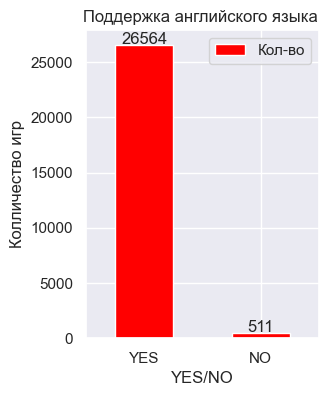

In [1037]:
counts = df['english'].value_counts()

fig, ax = plt.subplots(figsize=(3, 4))

counts.plot(kind='bar', color='red', ax=ax)

for elem in ax.patches:
    ax.annotate(
        str(elem.get_height()),
            (elem.get_x() + elem.get_width() / 2, elem.get_height()),
            ha='center', va='center',
            xytext=(0, 4),
            textcoords='offset points')

ax.legend(['Кол-во'],ncol=2, loc="upper right", frameon=True)
plt.title('Поддержка английского языка ')
plt.xlabel('YES/NO')
plt.ylabel('Колличество игр')
plt.xticks(rotation=0)

plt.show()

#### Платные игры/Бесплатные игры

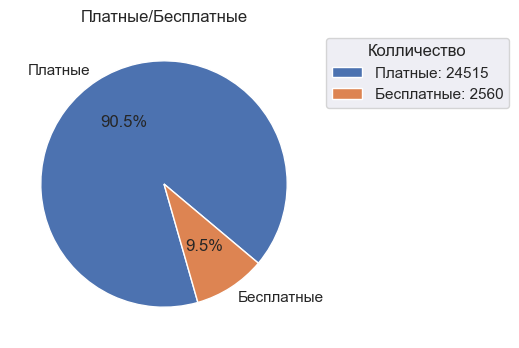

In [1038]:
df['free_paid'] = df['price'] > 0
counts = df['free_paid'].value_counts()
labels = ['Платные', 'Бесплатные']
count_labels = [f'{label}: {count}' for label, count in zip(labels, counts)]


fig, ax = plt.subplots(figsize=(4, 4))

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=320)

ax.legend(count_labels, title='Колличество', loc='upper left', bbox_to_anchor=(1, 0, 1, 1))
plt.title('Платные/Бесплатные')


plt.show()

#### Кол-во выпущенных игр по годам

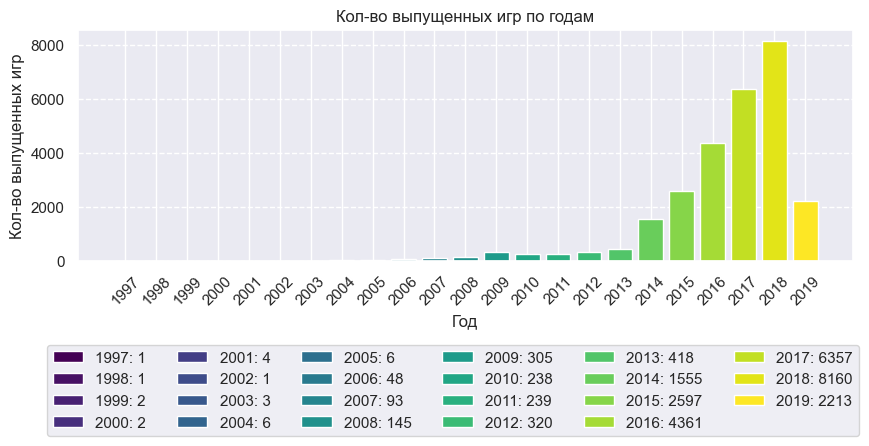

In [1039]:
df_year_count = df.groupby('year').size().reset_index(name='count')
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(df_year_count))))
count_labels = [f'{label}: {count}' for label, count in zip(df_year_count['year'].values, df_year_count['count'].values)]


fig1 = plt.figure(figsize=(10, 3))
fig2 = plt.gcf()

bar = plt.bar(df_year_count['year'], df_year_count['count'], color=cmap.colors)

fig2.legend(bar.patches, count_labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=6)
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во выпущенных игр')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xticks(df_year_count['year'], rotation=45)

plt.show()


#### Tоп 10 разработчиков видеоигр/Tоп 10 издателей видеоигр

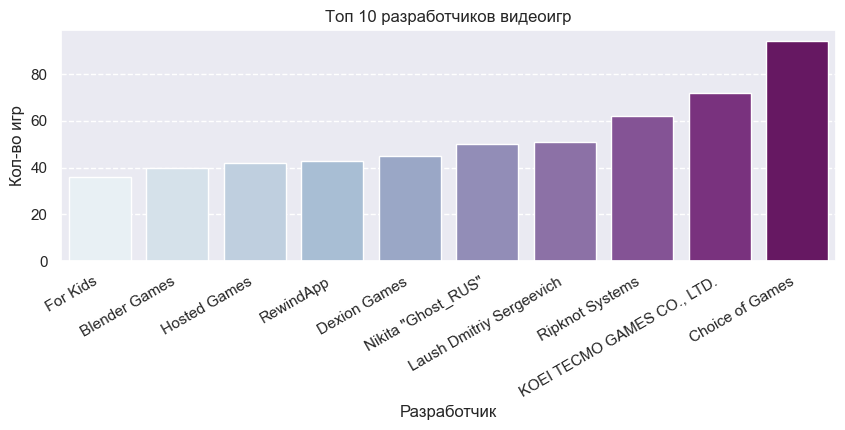

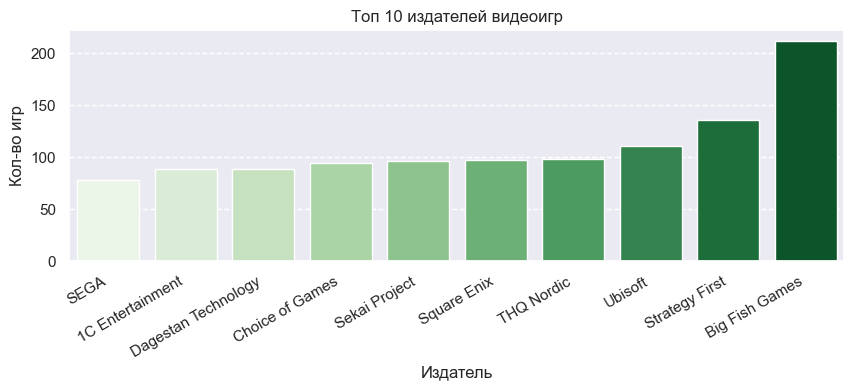

In [1040]:
df_developer_count = df.groupby('developer').size().reset_index(name='count').sort_values(by='count')
df_publisher_count = df.groupby('publisher').size().reset_index(name='count').sort_values(by='count')

developer_count_10 = df_developer_count.iloc[-10:]
publisher_count_10 = df_publisher_count.iloc[-10:]



fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(x="developer", y="count", hue='developer', data=developer_count_10, label="Total", palette='BuPu')

ax.set(xlim=(-0.5, 9.5), xlabel="Разработчик", ylabel="Кол-во игр")
plt.title('Tоп 10 разработчиков видеоигр')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(x="publisher", y="count", hue='publisher', data=publisher_count_10, label="Total", palette='Greens')

ax.set(xlim=(-0.5, 9.5), xlabel="Издатель", ylabel="Кол-во игр")
plt.title('Tоп 10 издателей видеоигр')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()


#### Tоп 6 игр по количеству пользователей

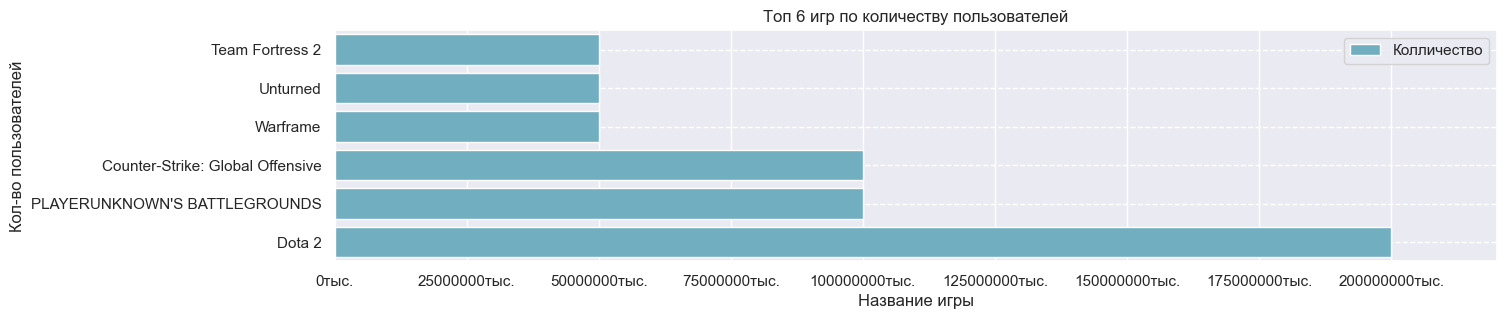

In [1041]:
top_game_owners_6 = df.sort_values(by='owners').iloc[-6:]
top_game_owners_6

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 3))

sns.barplot(x="owners", y="name", data=top_game_owners_6,
            label="Колличество", color="c")

ax.legend(ncol=1, loc="upper right", frameon=True)
xticks = ax.get_xticks()
ax.set_xticklabels([f'{int(x)}тыс.' for x in xticks])
ax.set_xlim(0, max(top_game_owners_6['owners']) * 1.1)
plt.title('Tоп 6 игр по количеству пользователей')
plt.xlabel('Название игры')
plt.ylabel('Кол-во пользователей')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()



#### Игры , процент положительных отзывов у которых не меньше 99% (pro*)

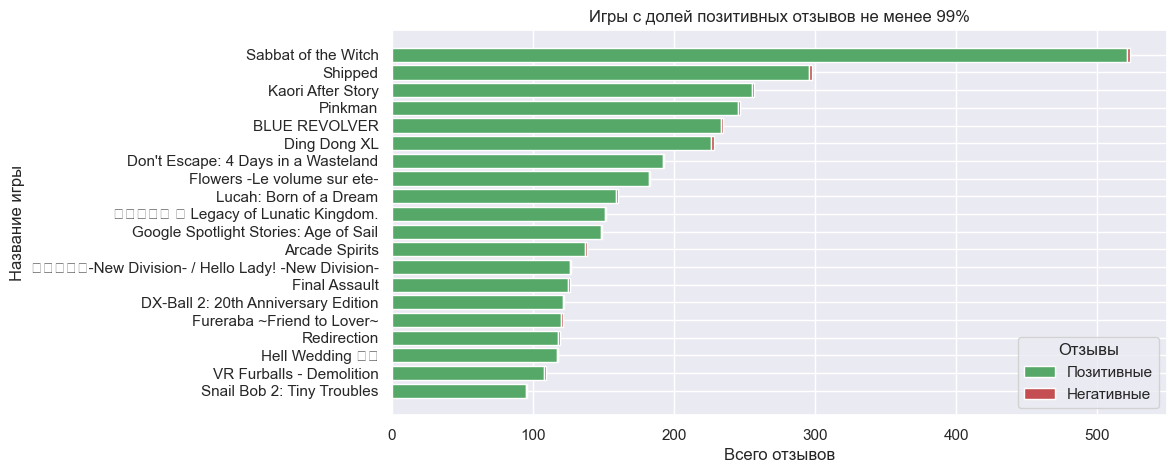

In [1042]:
yes_neg_rat = df[df['negative_ratings'] > 0].copy()
yes_neg_rat['all_ratings'] = yes_neg_rat['positive_ratings'] + yes_neg_rat['negative_ratings']
yes_neg_rat['percentage_positive'] = round(yes_neg_rat['positive_ratings'] * 100 / yes_neg_rat['all_ratings'], 1)

result = yes_neg_rat[yes_neg_rat['percentage_positive'] >= 99]
result = result.sort_values(by='all_ratings')

plt.figure(figsize=(10, 5))

plt.barh(result['name'], result['positive_ratings'], color='g', label='Позитивные')
plt.barh(result['name'], result['negative_ratings'], left=result['positive_ratings'], color='r', label='Негативные')

plt.xlabel('Всего отзывов')
plt.ylabel('Название игры')
plt.title('Игры с долей позитивных отзывов не менее 99%')
plt.legend(title='Отзывы')

plt.show()


#### Распределение игр по платформам (pro*)

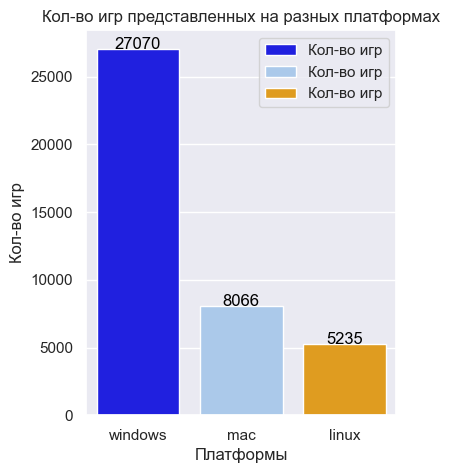

In [1043]:
def count_game(dictonary, series):
    '''Подсчет игр для каждой платформы.'''

    for i in series:
        if ';' not in i:
            dictonary[i] += 1
        else:
            count_game(dictonary, i.split(';'))
    return dictonary

platforms_dict = Counter()
series_platforms = df['platforms']
top_platforms = count_game(platforms_dict, series_platforms)
df_platforms = pd.DataFrame({'platforms': top_platforms.keys(), 'count_game': top_platforms.values()})


fig, ax = plt.subplots(figsize=(4, 5))
sns.set_theme(style="darkgrid")

sns.set_color_codes("pastel")
bars = sns.barplot(x='platforms',
                   y='count_game',
                   hue='platforms',
                   data=df_platforms,
                   label=['Кол-во игр'],
                   palette=["blue", "b","orange"])

for index, row in df_platforms.iterrows():
    bars.text(index, row.count_game, row.count_game, color='black', ha="center")


ax.legend(ncol=1, loc="upper right", frameon=True)
plt.title('Кол-во игр представленных на разных платформах')
ax.set(xlim=(-0.5, 2.5), xlabel='Платформы', ylabel="Кол-во игр")
plt.title('Кол-во игр представленных на разных платформах')

plt.show()

## Вывод

Мною были проанализированы данные по играм на площадке Steam

Библиотеки , которыми пользовался:
- pandas
- numpy
- matplotlib
- seaborn
- pprint
- сollections
- warnings

Выполненны следующие действия:
* Предобработка данных (пропуски, дубликаты и т.д.) 
* Рассчёт средней стоимости игр в `Steam`
* Рассчёт медианной стоимости игр в `Steam`
* Нашел игры процент положительных отзывов у которых `>=99%`
* Нашел игры, которые удовлятворяют следующему условию: возраст `+18`, год выпуска `2019`, жанр `симулятор`
* Проанализировал разные топы:
    - Топ игра по достижениям
    - Топ игра по позитивным отзывам
    - Топ игра по негативным щтзывам
    - Топ игра по кол-ву покупателей
    - Самая дорогая игра
    - Самая дешевая игра не учитывая бесплатные
    - Самый популярный жанр игры
    - Самая распрастранненная платформа у разработчиков игр
    - Лучший год по продажам $/шт.
    - Худжий год по продажам $/шт.
    - Лучший разработчик игр (кол-во разработанных игр)
    - Худший разработчик игр (кол-во разработанных игр)
* Построил диаграммы:
    - Поддержка англиского языка
    - Платные игры/Бесплатные игры
    - Кол-во выпущенных игр по годам
    - Tоп 10 разработчиков видеоигр/Tоп 10 издателей видеоигр
    - Tоп 6 игр по количеству пользователей
    - Игры , процент положительных отзывов у которых не меньше 99% 
    - Распределение игр по платформам

Данный анализ помог мне познакомится с рынком компьютерных игр 